### Ejemplos sesión Text Analytics Ic

#### Topic modeling

In [2]:
import nltk
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


### Definimos una función de tokenización customizada

In [88]:
def tokenize(sentence):
    tokens = nltk.word_tokenize(sentence)
    ps = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    tokens2 = [token 
               for token in tokens  if token not in stop_words]
    stems = [ps.stem(token) for token in tokens2 if token.isalpha()]
    return stems

In [89]:
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix 

### Cargamos los datos

In [90]:
reuters=pd.read_csv('Reuters/reuters.txt.gz',sep='\t')
# We leave only three topics for analysis: Crude Oil, Coffee and Grain-related news
reuters = reuters[reuters.Topic.isin(["trade","crude","grain"])]
reuters


,Topic,Content
1,grain,the u.s. agriculture department reported the f...
25,trade,"inflation plan, initially hailed at home and a..."
31,grain,the commodity credit corporation (ccc) announc...
52,grain,the agricultural stabilization and conservatio...
57,grain,there were seven grain ships loading and six s...
...,...,...
9495,crude,atlantic richfield's arco oil and gas co said ...
9504,crude,"william crowe, chairman of the u.s. joint chie..."
9512,crude,u.s. warships destroyed an iranian oil platfor...
9517,trade,the european community is willing to offer lim...


In [91]:
print(pd.crosstab(reuters.Topic,columns="Topic").to_string())

col_0  Topic
Topic       
crude    419
grain    456
trade    401


In [92]:
reuters["tokens"]=reuters.apply(lambda x: tokenize(x.Content),axis=1)

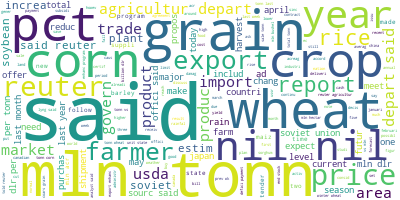

In [93]:
from wordcloud import WordCloud
long_string = ','.join(reuters[reuters.Topic=="grain"]['tokens'].sum())
# WordCloud object
wordcloud = WordCloud(background_color="white", max_words=500, contour_width=6, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

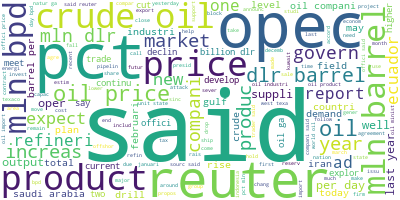

In [94]:
from wordcloud import WordCloud
long_string = ','.join(reuters[reuters.Topic=="crude"]['tokens'].sum())
# WordCloud object
wordcloud = WordCloud(background_color="white", max_words=500, contour_width=6, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

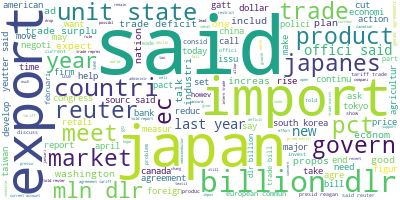

In [95]:
from wordcloud import WordCloud
long_string = ','.join(reuters[reuters.Topic=="trade"]['tokens'].sum())
# WordCloud object
wordcloud = WordCloud(background_color="white", max_words=500, contour_width=6, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

### Creación de una estructura Corpus con los textos de coffee


In [126]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(reuters['tokens'])
# Filtro de extremos. Eliminar tokens que aparecen en menos de 10 documentos, más del 30% de documentos , manteniendo los 10000 tokens más frecuentes
id2word.filter_extremes(no_below=10, no_above=0.30, keep_n=5000)# Create Corpus
texts = reuters['tokens']
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]



In [127]:
#id2word contiene el indice de tokens
print("Tokens: %i" % len(id2word))
print("Un token: %s" % id2word[50])

Tokens: 1656
Un token: halt


In [128]:
# Corpus tiene tantas entradas como documentos
print("Documentos: %i" % len(corpus))
print("Un documento: %s" % corpus[50])

Documentos: 1276
Un documento: [(16, 1), (20, 1), (24, 1), (60, 1), (64, 1), (81, 1), (94, 1), (107, 2), (121, 2), (140, 2), (148, 1), (158, 1), (159, 2), (165, 1), (199, 1), (210, 1), (217, 1), (231, 1), (234, 1), (235, 2), (239, 1), (240, 1), (243, 2), (245, 1), (258, 2), (263, 7), (268, 2), (276, 1), (279, 1), (282, 1), (291, 1), (303, 2), (308, 1), (328, 2), (340, 2), (419, 2), (427, 2), (436, 1), (441, 2), (474, 1), (493, 2), (501, 1), (503, 1), (506, 1), (508, 1), (520, 1), (532, 1), (547, 2), (571, 1), (589, 1), (620, 1), (627, 3), (656, 1), (686, 1), (708, 2), (715, 1), (720, 2), (787, 1), (862, 2), (993, 1), (994, 1), (995, 1), (996, 2), (997, 1), (998, 1), (999, 1)]


### Ajuste del modelo LDA

In [129]:
from pprint import pprint
import gensim
# number of topics
num_topics = 3
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"offici" + 0.008*"barrel" + 0.007*"billion" + 0.007*"tonn" + '
  '0.006*"japan" + 0.006*"industri" + 0.006*"report" + 0.006*"opec" + '
  '0.006*"state" + 0.006*"crude"'),
 (1,
  '0.015*"tonn" + 0.011*"billion" + 0.007*"total" + 0.007*"wheat" + '
  '0.007*"month" + 0.006*"countri" + 0.006*"bpd" + 0.005*"offici" + '
  '0.005*"januari" + 0.005*"week"'),
 (2,
  '0.010*"billion" + 0.009*"wheat" + 0.008*"japan" + 0.008*"tonn" + '
  '0.006*"grain" + 0.006*"agricultur" + 0.006*"offici" + 0.005*"state" + '
  '0.005*"corn" + 0.005*"countri"')]


In [125]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle 
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
#    pyLDAvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/Users/pedro/opt/anaconda3/envs/R_and_Python/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.002413 -0.009154       1        1  40.583426
2     -0.011892  0.003027       2        1  36.036339
0      0.009480  0.006127       3        1  23.380236, topic_info=        Term         Freq        Total Category  logprob  loglift
61       mln  1832.000000  1832.000000  Default  30.0000  30.0000
154      oil  1722.000000  1722.000000  Default  29.0000  29.0000
36   billion  1008.000000  1008.000000  Default  28.0000  28.0000
42       dlr  1428.000000  1428.000000  Default  27.0000  27.0000
53    import   821.000000   821.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
425     also   118.390082   531.611217   Topic3  -5.5184  -0.0486
53    import   134.225664   821.245540   Topic3  -5.3929  -0.3580
704  japanes   110.439541   452.570610   Topic3  -5.5879   0.0428
54   increas   109.098375   447.135005   Topic3  -5.6002   0.0427
363     tonn   120.892645  1063.121145   Topic3  -5.4975  -0.7208

[235 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1083      1  0.223673      acr
1083      2  0.642159      acr
1083      3  0.137090      acr
668       1  0.334554   africa
668       2  0.525727   africa
...     ...       ...      ...
86        2  0.330816     year
86        3  0.222256     year
775       1  0.624026  zealand
775       2  0.242677  zealand
775       3  0.138673  zealand

[471 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

In [113]:
# A partir de la estructura corpus, podemos obtener su representación en TF/IDF
from gensim import corpora, models
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
# Corpus tiene tantas entradas como documentos
print("Documentos: %i" % len(corpus_tfidf))
print("Un documento: %s" % corpus_tfidf[50])



Documentos: 1276
Un documento: [(21, 0.0469091396723698), (28, 0.03846503459428514), (29, 0.21517109756227396), (33, 0.030327942603458318), (35, 0.00016376457453184075), (62, 0.020546961837932826), (85, 0.04279959796052163), (88, 0.0476081716535582), (92, 0.03468107567537697), (99, 0.008558937086376783), (115, 0.06587848311160353), (135, 0.045964673901085405), (152, 0.08393569375650775), (189, 0.11923353233380037), (214, 0.025875506947004964), (218, 0.07432772260718133), (228, 0.054501825402640265), (233, 0.10643304578817159), (234, 0.0464120087373179), (241, 0.03334061437131395), (242, 0.17201755583446507), (248, 0.06267212611862392), (292, 0.053935196300522306), (304, 0.030193819337574368), (308, 0.06137697418552799), (313, 0.03799188520952345), (333, 0.04130990115972911), (336, 0.06240152422016855), (338, 0.10258643802031508), (345, 0.0744906891852225), (346, 0.05129321901015754), (350, 0.07325572723949449), (352, 0.06350345621913268), (368, 0.07948503303331185), (375, 0.39992028974

In [114]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=num_topics, id2word=id2word, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.003*"trade" + 0.003*"opec" + 0.002*"oil" + 0.002*"mln" + 0.002*"bpd" + 0.002*"japan" + 0.002*"price" + 0.002*"pct" + 0.002*"wheat" + 0.002*"offici"
Topic: 1 Word: 0.004*"billion" + 0.003*"trade" + 0.003*"tonn" + 0.003*"oil" + 0.002*"dlr" + 0.002*"corn" + 0.002*"price" + 0.002*"mln" + 0.002*"export" + 0.002*"barrel"
Topic: 2 Word: 0.006*"tonn" + 0.004*"mln" + 0.003*"wheat" + 0.002*"maiz" + 0.002*"export" + 0.002*"dlr" + 0.002*"oil" + 0.002*"grain" + 0.002*"pct" + 0.002*"barley"


In [ ]:
### Aplicación del modelo a un docuemento no visto

In [145]:
new_doc = 'wheat exports has rocketed during last century in all countries'
bow_vector = id2word.doc2bow(tokenize(new_doc))
for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.7626542448997498	 Topic: 0.010*"billion" + 0.009*"wheat" + 0.008*"japan" + 0.008*"tonn" + 0.006*"grain"
Score: 0.1191026046872139	 Topic: 0.009*"offici" + 0.008*"barrel" + 0.007*"billion" + 0.007*"tonn" + 0.006*"japan"
Score: 0.11824321746826172	 Topic: 0.015*"tonn" + 0.011*"billion" + 0.007*"total" + 0.007*"wheat" + 0.007*"month"
